## Context and Description
* Background Information

 This dataset is from the Boston Marathon of 2017; it contains information about the participants and their finish times in different time interval. The Boston Marathon is an annual marathon hosted by several cities in greater Boston in eastern Massachusetts, United States. The Finishers Boston Marathon 2017 dataset was found on Kaggle. 
 
 
* Information about Data Collection
 
 The official Boston Marathon organization collected the data for the race in 2017. On April 17, 2017, the Boston Marathon was held and the finish times and division placements were recorded. A marathon timing chip was used to record all the timings. The demographic information was collected through the registration process. An implication that comes with using chip technology is that there is a chance that the registered chip does not match the marathon participant.



### Exploratory Analysis
* Summary Statistics

  This dataset contains 26410 rows and 25 variables. “It contains the name, age, gender, country, city and state (where available), times at 9 different stages of the race, expected time, finish time and pace, overall place, gender place and division place” (Kaggle). The dataset is clean. There are only some NaN in "Citizen" variables, but for other variables, all of them contains valid values. In our analysis, we did not use the variable "Citizen" since it does not give any useful insights of our analysis. 
  
  
* Unusual Features

  Since the "Country" variable has too many levels, we decide to recode this variable down to 2 levels: "1" for US participants, "0" otherwise, we want to see if there is significant difference in finish time for people from US and outside from US. For further analysis, we also divided countries into 4 categories: Asia, Africa, America, and Europe. To build a model, we have to create dummy variables. One of the categories is going to be baseline and the other categories will be filled with “0” or “1” depending on the nationality of participants. By One way - ANOVA test, we can see that the Region makes difference in finish time significantly. Also, we have made “Gender” a dummy variable. If a participant is a male, then the “Male” column is filled with “1” and “0” otherwise.



### Findings:
* 
* 


## Part1: Data Description:


### Research Questions
* What is the difference in finish time (“Time_Minutes”) between US participants and non US participants (“Country”)? 
* Can the finish time (“Time_Minutes”) be predicted based on the other variables?


## Part2：Exploratory Data Analysis:

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from  sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pygam import LinearGAM
from pygam.utils import generate_X_grid
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('marathon_results_2017.csv')
print(data.shape)
print(data.info())
print(data.describe())
# as we can see, there is 26410 rows and 25 variables,
#not many NaN values.

(26410, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 25 columns):
Unnamed: 0       26410 non-null int64
Bib              26410 non-null object
Name             26410 non-null object
Age              26410 non-null int64
M/F              26410 non-null object
City             26410 non-null object
State            22815 non-null object
Country          26410 non-null object
Citizen          1254 non-null object
Unnamed: 9       91 non-null object
5K               26410 non-null object
10K              26410 non-null object
15K              26410 non-null object
20K              26410 non-null object
Half             26410 non-null object
25K              26410 non-null object
30K              26410 non-null object
35K              26410 non-null object
40K              26410 non-null object
Pace             26410 non-null object
Proj Time        26410 non-null object
Official Time    26410 non-null object
Overall          26410 non-

# Marathon Participants 
### 1: By Age
### 2: By Gender
### 3: By Country(recode)

In [3]:
#convert "official time" format to minutes, it's easy to calculate 
def convert_to_minutes(time):
    minutes = time.str.split(':').map(lambda x: int(x[-1]) / 60 + int(x[-2]) + int(x[-3]) * 60)
    return minutes
data['Time_Minutes'] = convert_to_minutes(data['Official Time'])
print(data.loc[:,['Official Time','Time_Minutes']].head())

# convert "pace" format to seconds.

def minutes_to_seconds(time):
    seconds = time.str[2:4].astype(int) * 60 + time.str[-2:].astype(int)
    return seconds
data['Pace_Time_Seconds'] = minutes_to_seconds(data['Pace'])
print(data.loc[:, ['Pace', 'Pace_Time_Seconds']]. head())

  Official Time  Time_Minutes
0       2:09:37    129.616667
1       2:09:58    129.966667
2       2:10:28    130.466667
3       2:12:08    132.133333
4       2:12:35    132.583333
      Pace  Pace_Time_Seconds
0  0:04:57                297
1  0:04:58                298
2  0:04:59                299
3  0:05:03                303
4  0:05:04                304


In [4]:
#Calcualte mean of finish time for each age group
time = data.loc[:,['Time_Minutes']]
decade = pd.cut(data.Age,bins=np.arange(10,99,10),right=False)
time["DECADE"] = decade
summary = time.groupby('DECADE')['Time_Minutes'].mean()
summary.index = np.arange(10,90,10) 
print(summary)   
#fastest group is 30-39 years old

10    255.197090
20    232.576644
30    228.135193
40    235.063972
50    246.556823
60    265.788384
70    292.434007
80    296.754762
Name: Time_Minutes, dtype: float64


### 1: Age and Gender Distribution

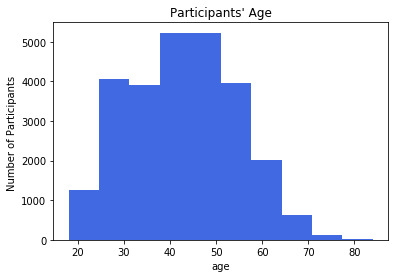

In [5]:
plt.hist(data.Age,color='royalblue')  #the age varies from 18 to 84 years old.
plt.title("Participants' Age")
plt.xlabel("age")
plt.ylabel("Number of Participants ")
plt.show()

Text(0.5,1,'Participation in 2017')

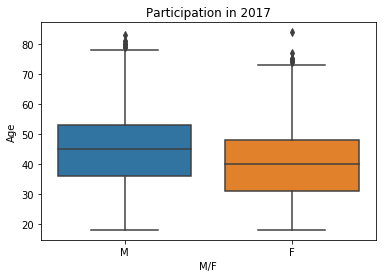

In [6]:
g = sns.boxplot(data['M/F'], data['Age'])
g.set_title("Participation in 2017")



### * Combine age and gender:

Text(0.5,1,'Participants by Age & Gender')

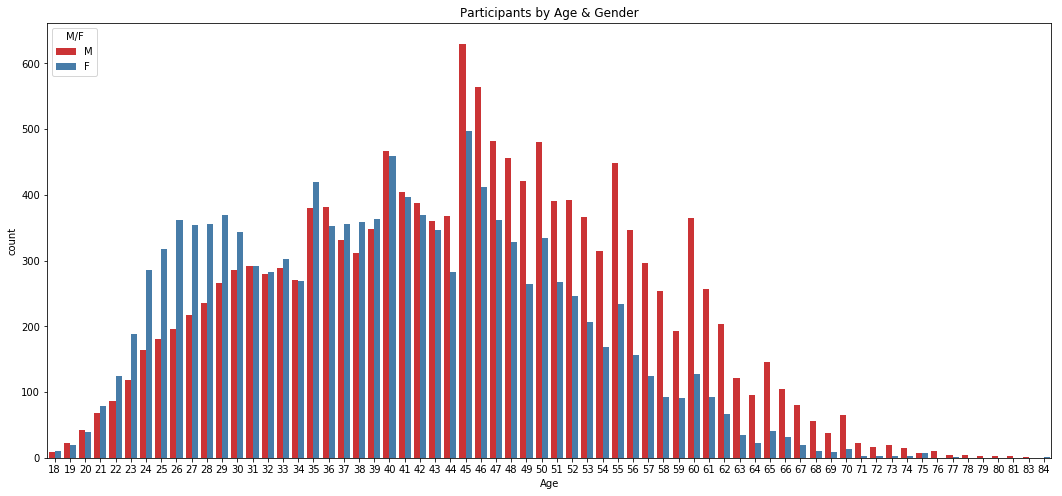

In [7]:
g = sns.countplot('Age', data=data, palette="Set1", hue='M/F')
g.figure.set_size_inches(18,8)
g.set_title("Participants by Age & Gender")

### * Country:

#### Top 15 Fastest Countries

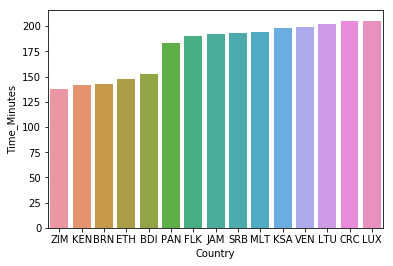

In [8]:
top_15_countries = data.groupby("Country")['Time_Minutes'].mean().nsmallest(15)

top15_countries = data.loc[data['Country'].isin(np.array(top_15_countries.index))]
top15_countries = top15_countries.groupby('Country')['Time_Minutes'].mean()
top15_countries = pd.DataFrame(top15_countries)
top15_countries = top15_countries.sort_values(['Time_Minutes'])
sns.barplot(x = top15_countries.index, y = top15_countries.Time_Minutes)

#### Worst 15 Countries

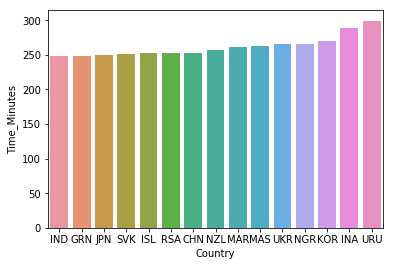

In [9]:
worst_15_countries = data.groupby("Country")['Time_Minutes'].mean().nlargest(15)

worst15_countries = data.loc[data['Country'].isin(np.array(worst_15_countries.index))]
worst15_countries = worst15_countries.groupby('Country')['Time_Minutes'].mean()
worst15_countries = pd.DataFrame(worst15_countries)
worst15_countries = worst15_countries.sort_values(['Time_Minutes'])
sns.barplot(x = worst15_countries.index, y = worst15_countries.Time_Minutes)

## ## Recode 'Country' into four categories

### 1 as US, 0 as outside US

In [10]:
data.Country.value_counts().head(10) #we can see there are many people are from USA.   

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
GER      226
BRA      205
AUS      191
JPN      170
ITA      165
Name: Country, dtype: int64

In [11]:
#create new variable "US" as a categorical variable with level 1 and 0
data['US'] = np.where(data.Country.str.contains('USA'),1,0)
data[['Country','US']].head(10)

,Country,US
0,KEN,0
1,USA,1
2,JPN,0
3,USA,1
4,KEN,0
5,USA,1
6,USA,1
7,ETH,0
8,USA,1
9,USA,1


Text(0.5,1,'US and outside US')

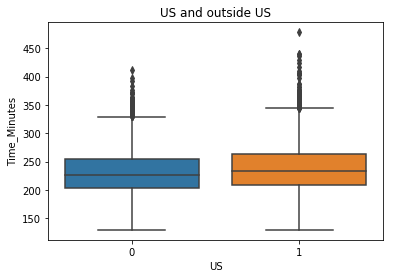

In [12]:
g = sns.boxplot(data['US'], data['Time_Minutes'])
g.set_title("US and outside US")

In [13]:
US = data.loc[:,['Time_Minutes','US']]
us_summary = US.groupby('US')['Time_Minutes'].mean()
us_summary2 = US.groupby('US')['Time_Minutes'].median()
print(us_summary)
print(us_summary2)
#from the mean and medain summary, 
#we can see people outside US perfom better then people from US
#since they use less time to finish the run.

US
0    231.786353
1    239.695991
Name: Time_Minutes, dtype: float64
US
0    226.416667
1    233.116667
Name: Time_Minutes, dtype: float64


In [14]:
#two sample t-test to see if the difference is significant or not.
from scipy import stats
US = data.loc[data.US == 1,['Time_Minutes','US']]
US.head()
nonUS = data.loc[data.US == 0,['Time_Minutes','US']]
nonUS.head()
t_stat, p_val = stats.ttest_ind(US, 
                      nonUS,
                      equal_var = False)
print(t_stat)
print(p_val)
#The differences in finish time is significant different 
#between participants from US and outside from US

[12.94862677         inf]
[5.19244219e-38 0.00000000e+00]


## Recode 'Country' into four categories

In [15]:
data.Country.unique()
# Africa : KEN, ETH, ZIM, BRN, BDI, RSA, EGY, MAR, ALG, NGR
# America : USA, MEX, BRA, CAN, COL, CRC, DOM, PAN, CHI, ARG, GUA, BER, CAY, FLK, VEN, JAM, HON, ECU, ESA, BAR, GRN,
# URU, PAR, TCA, TRI, 
# Asia : JPN, NZL, PER, AUS, MAS, PHI, SIN, CHN, TWN, HKG, IND, UAE, KOR, THA, ISR, KSA, NCA, INA, KUW, MGL, 
# Europe : ITA, NED, IRL, GBR, ESP, SUI, NOR, POL, FRA, RUS, POR, BEL, DEN, AUT, SLO, EST, TUR, SWE, FIN, LTU, GER, CRO,
# ISL, LUX, SRB, CZE, MLT, HUN, ROU, LAT, UKR, SMR, BUL, SVK, AND, GRE

array(['KEN', 'USA', 'JPN', 'ETH', 'ZIM', 'MEX', 'BRN', 'BRA', 'CAN',
       'ITA', 'NED', 'IRL', 'BDI', 'GBR', 'GER', 'ESP', 'SUI', 'COL',
       'NOR', 'POL', 'FRA', 'RUS', 'POR', 'CRC', 'BEL', 'NZL', 'PER',
       'DOM', 'PAN', 'AUS', 'DEN', 'MAS', 'PHI', 'CHI', 'AUT', 'ARG',
       'SIN', 'CHN', 'TWN', 'GUA', 'RSA', 'HKG', 'SLO', 'EST', 'TUR',
       'EGY', 'IND', 'UAE', 'SWE', 'BER', 'KOR', 'CAY', 'FIN', 'LTU',
       'GRE', 'CRO', 'ISL', 'LUX', 'FLK', 'VEN', 'JAM', 'THA', 'HON',
       'SRB', 'CZE', 'ISR', 'MLT', 'HUN', 'ECU', 'KSA', 'ESA', 'MAR',
       'ROU', 'LAT', 'UKR', 'SMR', 'BUL', 'ALG', 'NCA', 'SVK', 'AND',
       'BAR', 'INA', 'GRN', 'URU', 'PAR', 'TCA', 'KUW', 'TRI', 'MGL',
       'NGR'], dtype=object)

In [16]:
africa = ['KEN', 'ETH', 'ZIM', 'BRN', 'BDI', 'RSA', 'EGY', 'MAR', 'ALG', 'NGR']
america = ['USA', 'MEX', 'BRA', 'CAN', 'COL', 'CRC', 'DOM', 'PAN', 'CHI', 'ARG', 'GUA', 'BER', 'CAY', 'FLK', \
           'VEN', 'JAM', 'HON', 'ECU', 'ESA', 'BAR', 'GRN', 'URU', 'PAR', 'TCA', 'TRI']
asia = ['JPN', 'NZL', 'PER', 'AUS', 'MAS', 'PHI', 'SIN', 'CHN', 'TWN', 'HKG', 'IND',\
        'UAE', 'KOR', 'THA', 'ISR', 'KSA', 'NCA', 'INA', 'KUW', 'MGL']
europe = ['ITA', 'NED', 'IRL', 'GBR', 'ESP', 'SUI', 'NOR', 'POL', 'FRA', 'RUS', 'POR', 'BEL', 'DEN', 'AUT',\
          'SLO', 'EST', 'TUR', 'SWE', 'FIN', 'LTU', 'GER', 'CRO', 'ISL', 'LUX', 'SRB', 'CZE', 'MLT', 'HUN',\
          'ROU', 'LAT', 'UKR', 'SMR', 'BUL', 'SVK', 'AND', 'GRE']
data['Region'] = 'NA'

In [17]:
data.loc[data['Country'].isin(africa), 'Region'] = "Africa"
data.loc[data['Country'].isin(america), 'Region'] = "America"
data.loc[data['Country'].isin(asia), 'Region'] = "Asia"
data.loc[data['Country'].isin(europe), 'Region'] = "Europe"
data.Region.head(10)

0     Africa
1    America
2       Asia
3    America
4     Africa
5    America
6    America
7     Africa
8    America
9    America
Name: Region, dtype: object

In [18]:
data.Region.unique()

array(['Africa', 'America', 'Asia', 'Europe'], dtype=object)

Region
Africa     217.457333
America    238.234973
Asia       244.069313
Europe     232.837971
Name: Time_Minutes, dtype: float64


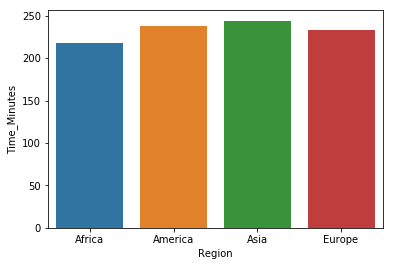

In [19]:
Region_time = data.groupby('Region')['Time_Minutes'].mean()
print(Region_time)
sns.barplot(x = Region_time.index, y = Region_time)

In [20]:
# Regions are significantly different.
stats.f_oneway(data[data['Region'] == "Africa"]['Time_Minutes'], data[data['Region'] == "America"]['Time_Minutes'], \
               data[data['Region'] == "Asia"]['Time_Minutes'], data[data['Region'] == "Europe"]['Time_Minutes'])

F_onewayResult(statistic=19.821127770662194, pvalue=7.905385082662423e-13)

## Part3: Data modeling:

In [21]:
# Making a dummy variables 

linear_model_data = pd.get_dummies(data, prefix='Gender', columns=['M/F'])
linear_model_data = pd.get_dummies(linear_model_data, prefix = 'Region', columns = ['Region'])
linear_model_data = pd.DataFrame(linear_model_data)
print(linear_model_data.head())

   Unnamed: 0 Bib              Name  Age           City State Country Citizen  \
0           0  11   Kirui, Geoffrey   24       Keringet   NaN     KEN     NaN   
1           1  17       Rupp, Galen   30       Portland    OR     USA     NaN   
2           2  23     Osako, Suguru   25   Machida-City   NaN     JPN     NaN   
3           3  21  Biwott, Shadrack   32  Mammoth Lakes    CA     USA     NaN   
4           4   9    Chebet, Wilson   31       Marakwet   NaN     KEN     NaN   

  Unnamed: 9       5K      ...      Division Time_Minutes Pace_Time_Seconds  \
0        NaN  0:15:25      ...             1   129.616667               297   
1        NaN  0:15:24      ...             2   129.966667               298   
2        NaN  0:15:25      ...             3   130.466667               299   
3        NaN  0:15:25      ...             4   132.133333               303   
4        NaN  0:15:25      ...             5   132.583333               304   

  US Gender_F Gender_M Region_Africa R

In [22]:
marathon_model = LinearRegression(fit_intercept= True)
X =linear_model_data.loc[:, ['Age', 'Gender_M', 'Region_Africa', 'Region_Asia', 'Region_America']]

In [23]:
marathon_model.fit(X, np.log(linear_model_data.Time_Minutes))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
marathon_model.coef_

array([ 0.0047167 , -0.11209307, -0.10284686,  0.03066378,  0.01275562])

In [25]:
X2 = sm.add_constant(X)
est = sm.OLS(np.log(linear_model_data['Time_Minutes']), X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Time_Minutes   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1021.
Date:                Tue, 12 Jun 2018   Prob (F-statistic):               0.00
Time:                        03:57:05   Log-Likelihood:                 11266.
No. Observations:               26410   AIC:                        -2.252e+04
Df Residuals:                   26404   BIC:                        -2.247e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.3055      0.005    969.

In [26]:
vif = [variance_inflation_factor(X2.values, i) for i in range(1,X2.shape[1])]
print(vif)

[1.053906981766139, 1.0592283476721198, 1.0268209172163971, 1.5131960232547392, 1.5592925443953263]


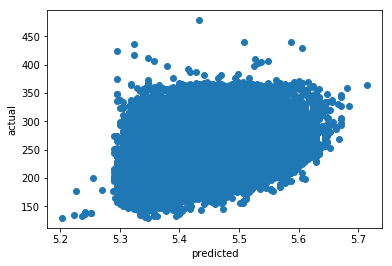

In [27]:
yhat = marathon_model.predict(X)
plt.plot(yhat, data.Time_Minutes, 'o')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

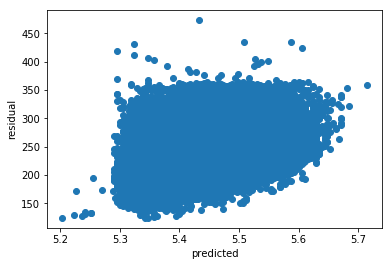

In [28]:
residuals = data.Time_Minutes - yhat
plt.plot(yhat, residuals, 'o')
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

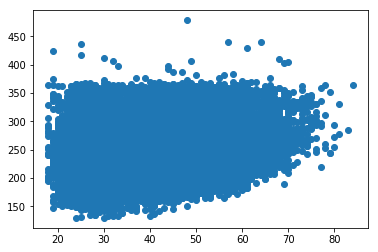

In [29]:
plt.plot(linear_model_data['Age'], linear_model_data['Time_Minutes'], 'o')
plt.show()

In [30]:
gam = LinearGAM(n_splines=10).gridsearch(X, np.log(data['Time_Minutes']))

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [31]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     12.6362
Link Function:                     IdentityLink Log Likelihood:                               -470626.8656
Number of Samples:                        26410 AIC:                                           941281.0035
                                                AICc:                                          941281.0186
                                                GCV:                                                0.0243
                                                Scale:                                              0.0242
                                                Pseudo R-Squared:                                   0.1863
Feature Function   Data Type      Num

In [32]:
# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, np.log(data['Time_Minutes']), test_size=0.3, random_state=42)

In [33]:
marathon_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
yhat_lm_cv = marathon_model.predict(X_test)
mse_lm = ((y_test - yhat_lm_cv) ** 2).mean()
print(mse_lm)
print(np.exp(0.024883640233079506))

0.024883640233079506
1.0251958220368913


In [35]:
gam = LinearGAM(n_splines=10).gridsearch(X_train, y_train)

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


In [36]:
yhat_gam_cv = gam.predict(X_test)
mse_gam = ((y_test - yhat_gam_cv) ** 2).mean()
print(mse_gam)
print(np.exp(0.024224091350402783))

0.024224091350402783
1.0245198782114426


## Random Forest to Predict finish time based on Gender, Age, and Region

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

data_RF = data.loc[:,['Age','M/F','Region','Time_Minutes']]
data_RF.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


,Age,M/F,Region,Time_Minutes
0,24,M,Africa,129.616667
1,30,M,America,129.966667
2,25,M,Asia,130.466667
3,32,M,America,132.133333
4,31,M,Africa,132.583333


In [38]:
features = pd.get_dummies(data_RF)
labels = features['Time_Minutes']
features = features.drop('Time_Minutes',axis=1)
feature_list = list(features.columns)
features = np.array(features)
labels = np.array(labels)
#training and testing
train_features,test_features,train_labels,test_labels = train_test_split(features,
                                                                         labels,
                                                                         test_size=0.25,
                                                                         random_state=42)
print("Training Features  shape: ", train_features.shape)
print("Training Labels shape: ", train_labels.shape)
print("Testing Features Shape: ", test_features.shape)
print("Testing Features Shape: ",test_labels.shape)

Training Features  shape:  (19807, 7)
Training Labels shape:  (19807,)
Testing Features Shape:  (6603, 7)
Testing Features Shape:  (6603,)


In [39]:
rf_exp = RandomForestRegressor(n_estimators=1000,random_state=100)
rf_exp.fit(train_features,train_labels)



predictions = rf_exp.predict(test_features)
error = abs(predictions-test_labels)
meanError = np.mean(100*(error/test_labels))
accuracy = 100 - meanError
print('Accuracy:',round(accuracy,2),'%.')

Accuracy: 87.62 %.
